In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator, math, statistics
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import seaborn as sb
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv("futbol.csv", parse_dates= True, index_col= 1)

In [15]:
dataset = np.array(df.filter(["Nationality","Club","Overall","Potential","Value","Wage"]).values)

In [16]:
countrySet = [x for x in np.unique(dataset[:,0], return_counts=True)]

In [17]:
#Creación de variables usadas para el marco de datos normalizedDataset
minMaxCount = MinMaxScaler().fit_transform(countrySet[1].reshape(-1,1)).flat[:]

mean = [statistics.geometric_mean(df[df["Nationality"]==pais]["Overall"])for pais in countrySet[0]]
minMaxMean = (MinMaxScaler().fit_transform(np.array(mean).reshape(-1,1))).flat[:]


In [18]:
normalizedDataset = pd.DataFrame(data={'Nationality':countrySet[0], 'Count': countrySet[1], "Mean": mean,
            'MinMaxCount': minMaxCount, 'MinMaxMean': minMaxMean})

In [20]:
normalizedDataset = normalizedDataset.assign(GeometricMean=[statistics.geometric_mean([data[0],data[1]])
                for data in normalizedDataset[['MinMaxCount', 'MinMaxMean']].values+.0000001])

In [25]:
normalizedDataset.sort_values('GeometricMean',ascending=True).head(n=60)

,Nationality,Count,Mean,MinMaxCount,MinMaxMean,GeometricMean
74,Indonesia,1,56.000000,0.000000,0.000000,1.000000e-07
19,Botswana,1,56.000000,0.000000,0.000000,1.000000e-07
138,South Sudan,1,60.000000,0.000000,0.190476,1.380131e-04
14,Belize,1,60.000000,0.000000,0.190476,1.380131e-04
98,Malta,1,61.000000,0.000000,0.238095,1.543034e-04
3,Andorra,1,62.000000,0.000000,0.285714,1.690309e-04
125,Qatar,1,63.000000,0.000000,0.333333,1.825742e-04
124,Puerto Rico,1,63.000000,0.000000,0.333333,1.825742e-04
129,Rwanda,1,63.000000,0.000000,0.333333,1.825742e-04
82,Jordan,1,63.000000,0.000000,0.333333,1.825742e-04


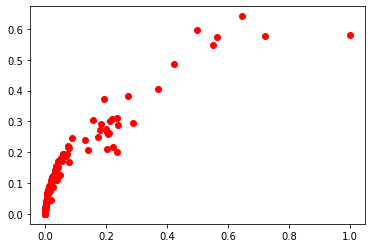

In [32]:
plt.scatter(normalizedDataset["MinMaxCount"].values, normalizedDataset["GeometricMean"].values, color='r')
plt.show()